In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format

#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
df_audi = pd.read_csv("audi.csv")
df_bmw = pd.read_csv("audi.csv")
df_cclass = pd.read_csv("cclass.csv")
df_focus = pd.read_csv("focus.csv")
df_ford = pd.read_csv("ford.csv")
df_hyundai = pd.read_csv("hyundai.csv")
df_hyundai = df_hyundai.rename(columns={"tax(£)":"tax"}) #칼럼명 변경
df_merc = pd.read_csv("merc.csv")
df_skoda = pd.read_csv("skoda.csv")
df_toyota = pd.read_csv("toyota.csv")
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vw = pd.read_csv("vw.csv")

#데이터 하나로 합치기
df_list = [df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw]
df = pd.concat(df_list, ignore_index=True)

# print("dtypes:", df.dtypes)
# print("describe:", df.describe())

print(df.shape)
df.sample(10)

(108427, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94925,Golf,2019,14995,Manual,17011,Diesel,145.0,57.7,1.6
9124,A5,2016,19690,Automatic,44717,Diesel,160.0,50.4,2.0
76224,Auris,2017,18450,Automatic,10526,Hybrid,135.0,70.6,1.8
68428,Citigo,2018,6995,Manual,28300,Petrol,145.0,64.2,1.0
42646,Kuga,2018,20250,Manual,4368,Petrol,145.0,39.2,1.5
41791,Focus,2019,26780,Manual,4763,Petrol,145.0,34.5,2.3
5739,A5,2019,26940,Automatic,69,Diesel,145.0,62.8,2.0
88351,Mokka X,2018,12499,Semi-Auto,11237,Petrol,150.0,43.5,1.4
37940,Focus,2016,9991,Manual,47477,Diesel,0.0,74.3,1.5
72528,Fabia,2019,11590,Manual,5252,Petrol,145.0,51.4,1.0


In [3]:
df.sample(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
98654,Golf,2020,21899,Manual,5000,Petrol,145.0,47.1,1.5
106072,Up,2013,4499,Manual,31310,Petrol,20.0,62.8,1.0
15923,RS6,2016,48990,Automatic,51600,Petrol,325.0,29.4,4.0
83069,Corsa,2017,8244,Manual,17837,Petrol,30.0,55.4,1.4
92886,Insignia,2017,9950,Manual,23719,Diesel,30.0,64.2,1.6
99286,Passat,2019,26990,Semi-Auto,3771,Diesel,145.0,48.7,2.0
69795,Yeti,2016,10999,Semi-Auto,23858,Petrol,125.0,51.4,1.2
105754,Up,2017,7490,Manual,21605,Petrol,20.0,64.2,1.0
32135,Fiesta,2015,9200,Semi-Auto,34808,Petrol,0.0,57.7,1.0
108184,Tiguan Allspace,2019,27499,Automatic,8000,Diesel,145.0,39.2,2.0


In [4]:
#베이스라인 모델 만들기
predict = df["price"].mean()
y_train = df["price"]

# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 7028.23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


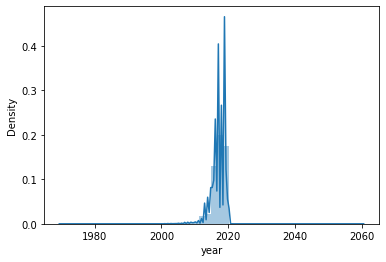

In [5]:
sns.distplot(df['year'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


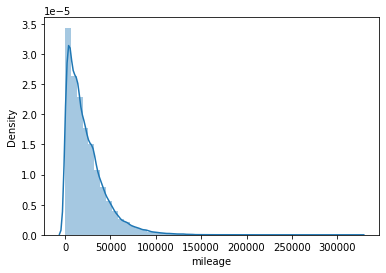

In [6]:
sns.distplot(df['mileage'], kde=True, rug=False)

16900.09885914025


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


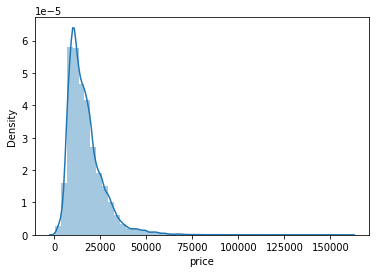

In [7]:
print(df['price'].mean())
sns.distplot(df['price'], kde=True, rug=False)

In [8]:
#이상치 제거
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) &
        (df['mileage'] >= np.percentile(df['mileage'], 0.5)) & 
        (df['mileage'] <= np.percentile(df['mileage'], 99.5)) &
        (df['engineSize'] >= np.percentile(df['engineSize'], 0.5)) & 
        (df['engineSize'] <= np.percentile(df['engineSize'], 99.5)) &
        (df['year'] >= np.percentile(df['year'], 0.5)) & 
        (df['year'] <= np.percentile(df['year'], 99.5))]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


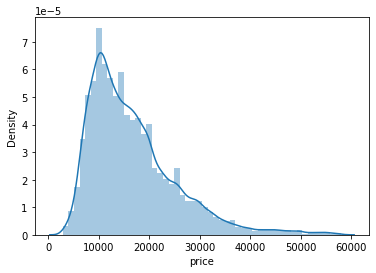

In [9]:
sns.distplot(df['price'], kde=True, rug=False)

22262.70145676869


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


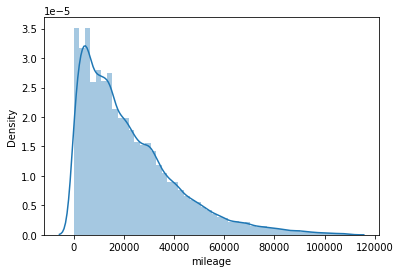

In [10]:
print(df['mileage'].mean())
sns.distplot(df['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


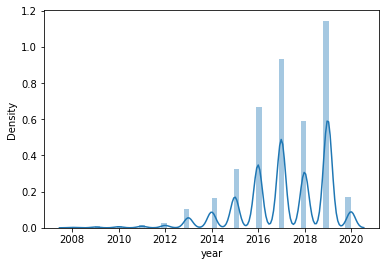

In [11]:
sns.distplot(df['year'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


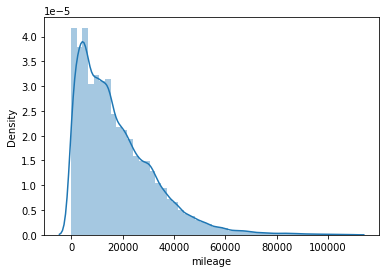

In [12]:
sns.distplot(df[(df['year']>2015)]['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


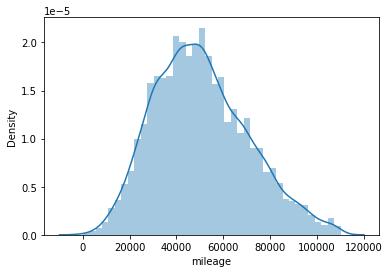

In [13]:
sns.distplot(df[(df['year']>2009)&(df['year']<2015)]['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


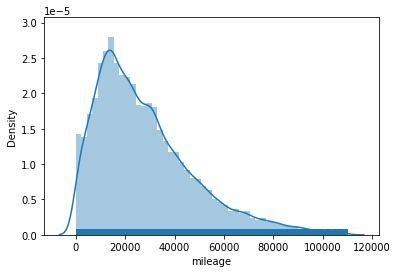

In [14]:
sns.distplot(df[(df['price']<=16500)]['mileage'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


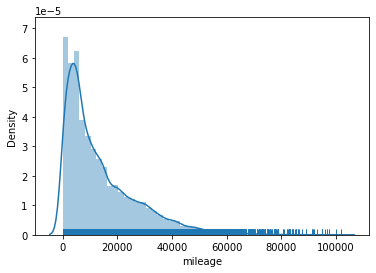

In [15]:
sns.distplot(df[(df['price']>16500)]['mileage'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


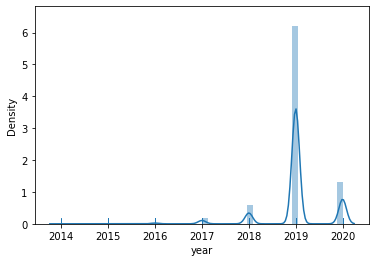

In [16]:
sns.distplot(df[(df['price']>16500)&(df['mileage']<10000)]['year'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


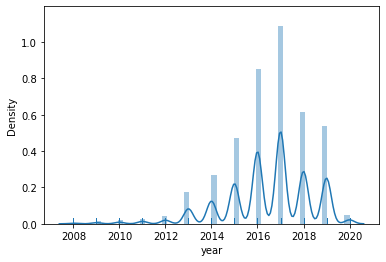

In [17]:
sns.distplot(df[(df['price']<=16500)]['year'], kde=True, rug=True)